In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

In [2]:
nqubits = 3
circuit = QuantumCircuit(nqubits, nqubits)
circuit.h(0)
circuit.cx(0,1)
circuit.cx(1,2)
circuit.measure([0,1,2], [0,1,2])

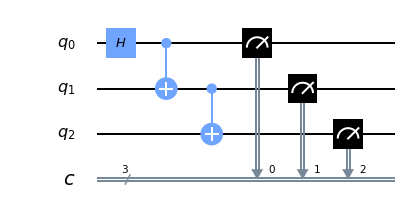

In [3]:
circuit.draw(output = 'mpl')

In [4]:
simulator = Aer.get_backend('qasm_simulator')
sim_result = execute(circuit,backend = simulator, shots = 1024).result()

In [5]:
from qiskit.visualization import plot_histogram

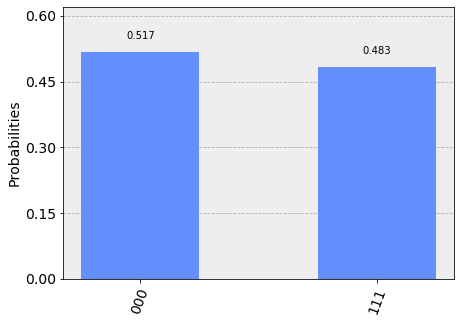

In [6]:
plot_histogram(sim_result.get_counts(circuit))

In [7]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub = 'ibm-q')
device = provider.get_backend('ibmqx2')

/opt/conda/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:181: UserWarning: Credentials are already in use. The existing account in the session will be replaced.
  warnings.warn('Credentials are already in use. The existing '


In [8]:
job = execute(circuit,backend = device, shots = 1024)
print(job.job_id())
from qiskit.tools.monitor import job_monitor
job_monitor(job)

5da623763c1181001284e035
Job Status: job has successfully run


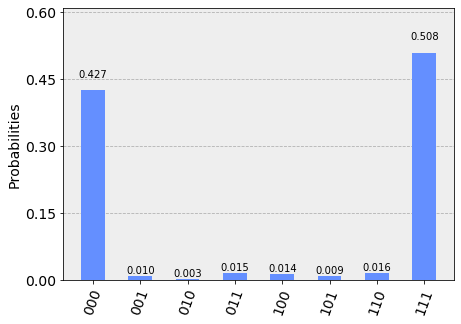

In [9]:
device_result = job.result()
plot_histogram(device_result.get_counts(circuit))

In [10]:
from qiskit.ignis.mitigation.measurement import complete_meas_cal, CompleteMeasFitter

In [11]:
cal_circuits, state_labels = complete_meas_cal(qr = circuit.qregs[0], circlabel = 'measerrormitigationcal')

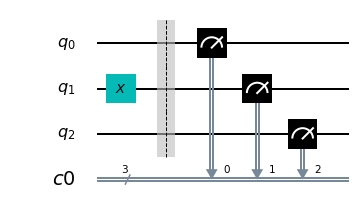

In [12]:
cal_circuits[2].draw(output = 'mpl')

In [13]:
len(cal_circuits)

8

In [14]:
cal_job = execute(cal_circuits,
                 backend = device,
                 shots = 1024,
                 optimization_level = 0
                 )
print(cal_job.job_id())
cal_results = cal_job.result()

5da6242547da900011364ff2


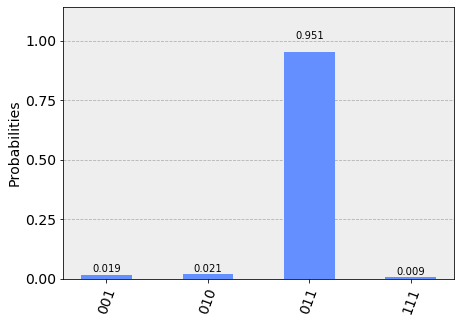

In [15]:
plot_histogram(
cal_results.get_counts(cal_circuits[3])
)

In [16]:
meas_fitter = CompleteMeasFitter(cal_results, state_labels)

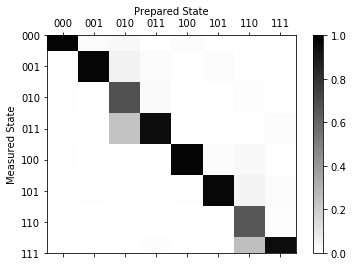

In [17]:
meas_fitter.plot_calibration()

In [18]:
meas_filter = meas_fitter.filter

In [19]:
mitigated_result = meas_filter.apply(device_result)

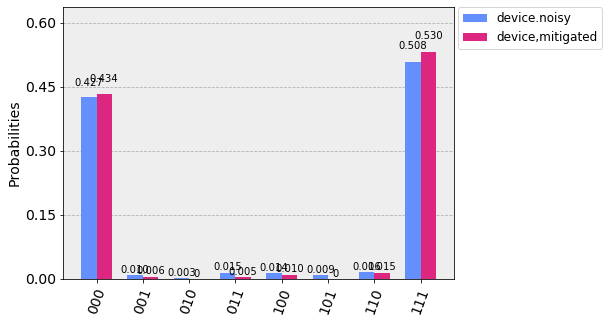

In [20]:
device_counts = device_result.get_counts(circuit)
mitigated_counts = mitigated_result.get_counts(circuit)
plot_histogram([device_counts, mitigated_counts], legend= ['device.noisy' , 'device,mitigated'])

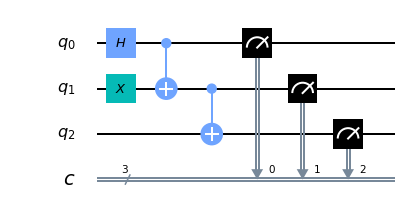

In [21]:
circuit2 = QuantumCircuit(3,3)
circuit2.x(1)
circuit2.h(0)
circuit2.cx(0,1)
circuit2.cx(1,2)
circuit2.measure([0,1,2],[0,1,2])
circuit2.draw(output = 'mpl')

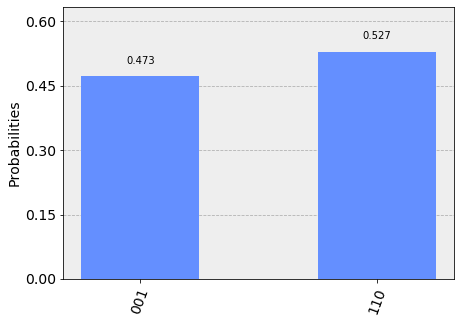

In [22]:
plot_histogram(

    execute(circuit2, backend = simulator, shots = 1024).result().get_counts(circuit2)
    
)

In [23]:
device_counts_2 = execute(circuit2, backend = device, shots = 1024).result().get_counts(circuit2)

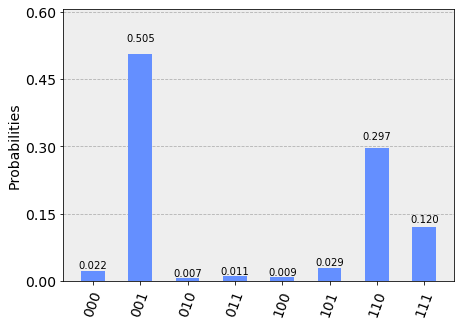

In [24]:
plot_histogram(device_counts_2)

In [25]:
device_mitigated_counts_2 = meas_filter.apply(device_counts_2)

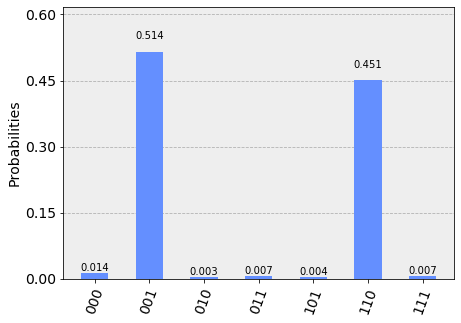

In [26]:
plot_histogram(device_mitigated_counts_2)